# Task 3: Regression problem

In [1]:
import sys
import numpy as np
import matplotlib
import sklearn
import tensorflow as tf
import torch

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)
print("Keras:", tf.keras.__version__)
print("PyTorch:", torch.__version__)

Python: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
NumPy: 2.4.1
Matplotlib: 3.10.8
scikit-learn: 1.8.0
TensorFlow: 2.20.0
Keras: 3.13.1
PyTorch: 2.10.0+cpu


In [2]:
housing = sklearn.datasets.fetch_california_housing()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    housing.data, housing.target, test_size=0.1, random_state=42)

X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42)
print(X_train.shape,Y_train.shape,X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)


(14860, 8) (14860,) (3716, 8) (3716,) (2064, 8) (2064,)


In [3]:
type(X_train), type(Y_train)

(numpy.ndarray, numpy.ndarray)

In [4]:
print(housing.feature_names, housing.target_names)
print(X_train[0], Y_train[0])


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']
[ 2.66290000e+00  2.10000000e+01  4.85815603e+00  1.09042553e+00
  2.63000000e+03  4.66312057e+00  3.64200000e+01 -1.21310000e+02] 1.027


little cleaning of the feature values


In [5]:
X_train = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_val = sklearn.preprocessing.StandardScaler().fit_transform(X_val)
X_test = sklearn.preprocessing.StandardScaler().fit_transform(X_test)

The Model

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=(8,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
model.summary()


c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val))

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9315 - mae: 0.5348 - val_loss: 16.3729 - val_mae: 0.6944
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3678 - mae: 0.5897 - val_loss: 0.5032 - val_mae: 0.5043
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4694 - mae: 0.4938 - val_loss: 0.4819 - val_mae: 0.5268
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4230 - mae: 0.4685 - val_loss: 0.4146 - val_mae: 0.4557
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4089 - mae: 0.4574 - val_loss: 0.3711 - val_mae: 0.4320


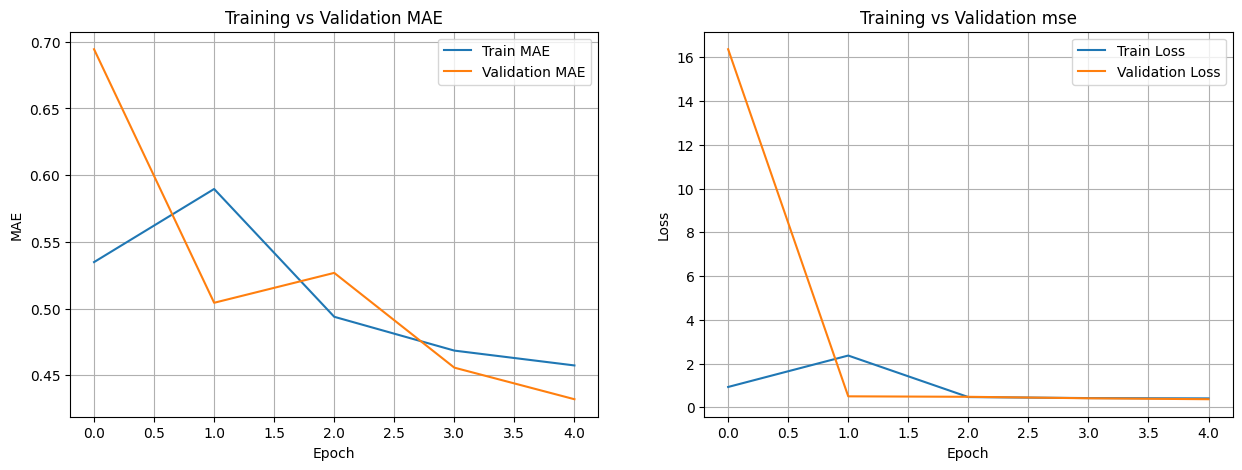

In [8]:
#plot training vs validation accuracy and loss

matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.plot(model_history.history['mae'], label='Train MAE')
matplotlib.pyplot.plot(model_history.history['val_mae'], label='Validation MAE')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('MAE')
matplotlib.pyplot.title('Training vs Validation MAE')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)

matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.plot(model_history.history['loss'], label='Train Loss')
matplotlib.pyplot.plot(model_history.history['val_loss'], label='Validation Loss')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.title('Training vs Validation mse')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()
matplotlib.pyplot.show()


New model with different learning rate (0.001)

In [12]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(64,input_shape=(8,)))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_history2 = model2.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val))

Epoch 1/5


465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6449 - mae: 0.5531 - val_loss: 0.4454 - val_mae: 0.4607
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4493 - mae: 0.4532 - val_loss: 0.4321 - val_mae: 0.4540
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3950 - mae: 0.4298 - val_loss: 0.4061 - val_mae: 0.4596
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3782 - mae: 0.4217 - val_loss: 0.3671 - val_mae: 0.4298
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3384 - mae: 0.4081 - val_loss: 0.3335 - val_mae: 0.4031


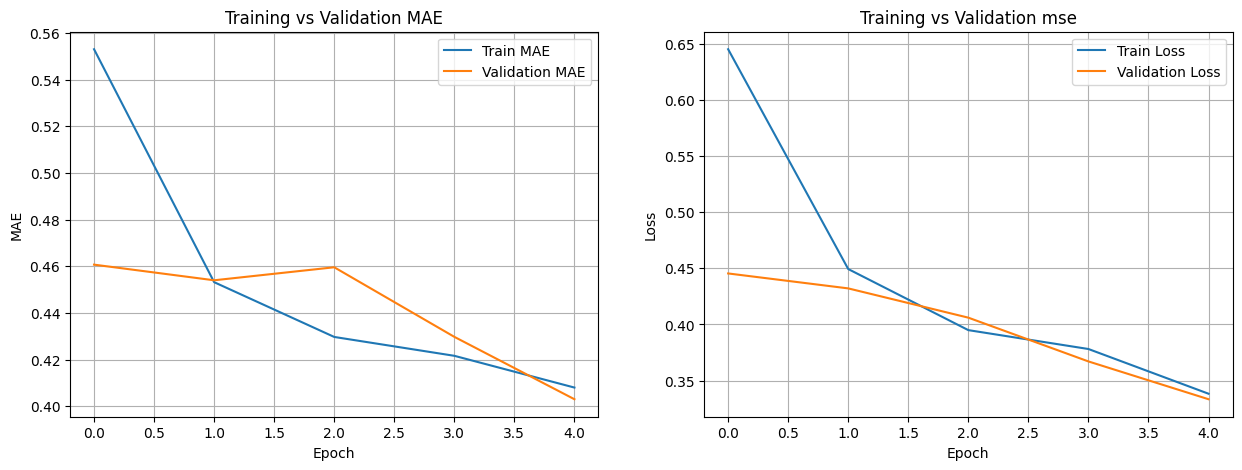

In [14]:
#plot training vs validation mae and loss

matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.plot(model_history2.history['mae'], label='Train MAE')
matplotlib.pyplot.plot(model_history2.history['val_mae'], label='Validation MAE')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('MAE')
matplotlib.pyplot.title('Training vs Validation MAE')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)

matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.plot(model_history2.history['loss'], label='Train Loss')
matplotlib.pyplot.plot(model_history2.history['val_loss'], label='Validation Loss')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.title('Training vs Validation mse')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()
matplotlib.pyplot.show()


In [15]:
model2.save_weights("model2.weights.h5")


In [16]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model2.weights.h5")

last_history = model2.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val), callbacks=[checkpoint_cb])

Epoch 1/5
459/465 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3510 - mae: 0.4161

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3340 - mae: 0.4048 - val_loss: 0.3606 - val_mae: 0.4358
Epoch 2/5
455/465 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3166 - mae: 0.3961

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3189 - mae: 0.3955 - val_loss: 0.3535 - val_mae: 0.4174
Epoch 3/5
454/465 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3190 - mae: 0.3881

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3159 - mae: 0.3901 - val_loss: 0.3573 - val_mae: 0.4284
Epoch 4/5
455/465 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3014 - mae: 0.3854

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3125 - mae: 0.3891 - val_loss: 0.3303 - val_mae: 0.3859
Epoch 5/5
457/465 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3781 - mae: 0.4003

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4135 - mae: 0.3937 - val_loss: 0.3327 - val_mae: 0.4036


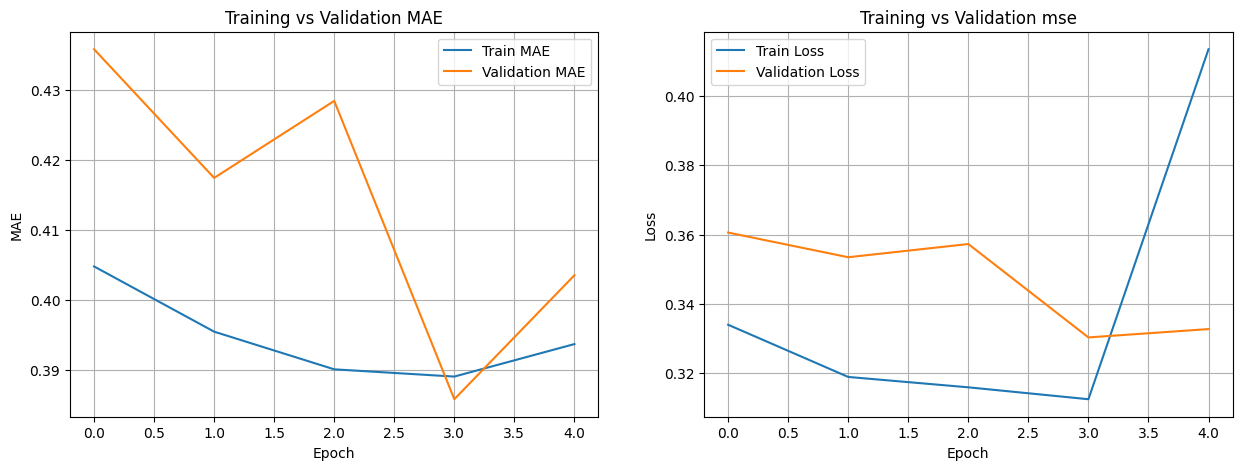

In [17]:
#plot training vs validation mae and loss

matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.plot(last_history.history['mae'], label='Train MAE')
matplotlib.pyplot.plot(last_history.history['val_mae'], label='Validation MAE')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('MAE')
matplotlib.pyplot.title('Training vs Validation MAE')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)

matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.plot(last_history.history['loss'], label='Train Loss')
matplotlib.pyplot.plot(last_history.history['val_loss'], label='Validation Loss')

matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.title('Training vs Validation mse')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()
matplotlib.pyplot.show()
